In [16]:
import jax

In [17]:
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import moscot
from moscot.problems.time import TemporalProblem
import moscot.plotting as mpl
import pandas as pd
import os
from anndata import AnnData
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=200)

import mplscience

mplscience.available_styles()
mplscience.set_style(reset_current=True)
plt.rcParams['legend.scatterpoints'] = 1 

['default', 'despine']


In [18]:
output_dir = "/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/plots/driver_features"

In [19]:
chromvar_features = pd.read_csv("/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/cisBP_chromvar_annotations_reduced.csv")

In [20]:
chromvar_features.set_index("Unnamed: 0", inplace=True)

In [21]:
chromvar_features = chromvar_features.T

In [22]:
chromvar_features["old_index"] = chromvar_features.index

In [23]:
chromvar_features

Unnamed: 0,new motif,new motif.1,new motif.2,new motif.3,new motif.4,new motif.5,new motif.6,new motif.7,new motif.8,new motif.9,...,new motif.6005,new motif.6006,new motif.6007,new motif.6008,new motif.6009,new motif.6010,new motif.6011,new motif.6012,new motif.6013,old_index
AAACAGCCAACAGCCT-1,1.878348,-2.326574,-0.401683,-0.255239,3.829100,0.199580,-0.107798,0.295339,-0.075315,0.238799,...,0.480307,-0.709020,-1.748959,-0.038442,-0.229562,0.386165,-0.027423,0.257352,0.386165,AAACAGCCAACAGCCT-1
AAACAGCCAACCCTCC-1,-1.170547,1.845117,1.331963,0.265037,2.898980,0.817671,-1.073966,-0.838177,0.576737,-0.186866,...,-1.549943,-0.169344,-0.670851,-1.100688,1.111134,-0.526795,-0.944912,1.570643,-0.526795,AAACAGCCAACCCTCC-1
AAACAGCCACTAAGCC-1,0.762531,0.972031,-1.220062,1.301809,1.957008,-0.948930,0.634590,-1.431303,-0.937821,0.023278,...,-0.539830,-1.305937,-0.685186,-0.396306,-0.480503,1.545979,0.017134,-0.361277,1.545979,AAACAGCCACTAAGCC-1
AAACAGCCATAAAGCA-1,0.596943,0.978257,-0.470966,1.723147,-1.007121,0.164035,1.639348,1.152172,1.477192,1.054555,...,-0.788425,-0.305061,0.908863,0.875109,-1.055717,-0.230218,0.132730,1.303854,-0.230218,AAACAGCCATAAAGCA-1
AAACATGCAAGGTAAC-1,0.820567,-0.242639,-1.094283,-1.004689,1.709406,-1.279201,0.585074,1.565074,1.146328,1.584011,...,-0.878558,-1.702515,-0.566856,-0.361246,-1.152272,-0.196382,-0.020663,-0.304843,-0.196382,AAACATGCAAGGTAAC-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTGCACGTAATT-4,-1.334293,-0.902895,1.122158,0.477793,1.723122,1.142323,-0.265249,-0.721424,-0.539103,-0.122076,...,-0.814866,0.778910,-2.549326,-0.601123,-0.118342,1.788359,0.758636,-0.858546,1.788359,TTTGGTGCACGTAATT-4
TTTGTGAAGCGGATTT-4,-0.701399,-1.036937,1.106585,0.895805,0.742153,1.263776,0.339884,0.995262,-0.165961,1.110130,...,-0.139605,1.099684,0.596353,1.576060,0.786463,0.214468,-0.470278,1.074960,0.214468,TTTGTGAAGCGGATTT-4
TTTGTGAAGTTGTCAA-4,0.061972,0.508479,-0.654489,0.365652,1.335623,1.649284,-0.697209,0.302501,-1.345410,0.904707,...,0.874090,0.683856,-1.114159,1.045577,-1.107483,-1.446137,-0.990893,0.275313,-1.446137,TTTGTGAAGTTGTCAA-4
TTTGTGTTCATTCATC-4,0.395046,-1.451920,-0.628218,-1.080058,-2.348800,-0.105451,-0.416318,-0.425593,-0.500771,0.692018,...,-0.115900,-1.378202,-0.291830,0.091214,-0.137773,-0.040900,-0.908674,-0.260044,-0.040900,TTTGTGTTCATTCATC-4


In [24]:
def rename_index(x):
    split = x["old_index"].split("_")
    if split[0] == "E14-5":
        return split[1]+"-0"
    if split[0] == "E15-5":
        return split[1]+"-1"
    raise ValueError("Pattern does not match: ", split)

In [25]:
#chromvar_features["index_adapted"] = chromvar_features.apply(rename_index ,axis=1)

In [26]:
#chromvar_features.set_index("index_adapted", inplace=True)

In [27]:
motif2TF = pd.read_csv("/lustre/groups/ml01/workspace/moscot_paper/pancreas/motif2TF.csv")

In [28]:
motif2TF["TF_name"] = motif2TF.apply(lambda x: x["TF_Name"].replace("[", "").replace("]", "").replace("'", "").split(), axis=1)

In [29]:
del motif2TF["TF_Name"]

In [30]:
del chromvar_features["old_index"]

In [31]:
motifs = motif2TF["Motif_ID"].values
rename_cols = {col: motifs[i] for i, col in enumerate(chromvar_features.columns)}

In [32]:
chromvar_features.rename(columns=rename_cols, inplace=True)

In [33]:
chromvar_features.to_csv("/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/cisBP_chromvar_features_processed.csv")

In [34]:
motif2TF.head()

,Motif_ID,direct_TF,TF_name
0,M00008_2.00,NaN,"[Setbp1, Ahctf1, Hmga1, Hmga2, Phf21a, Hmga1-rs1]"
1,M00044_2.00,NaN,[Foxp3]
2,M00056_2.00,NaN,"[A1JVI6_MOUSE, Sebox, Phox2a, Phox2b, Alx3, Vs..."
3,M00060_2.00,NaN,"[Hsf2, Hsf4]"
4,M00066_2.00,NaN,"[Rfx4, Rfx2, Rfx1, Rfx3]"


In [35]:
motif2TF_dict = pd.Series(motif2TF["TF_name"].values,index=motif2TF["Motif_ID"].values).to_dict()
motif2TF_direct_dict = pd.Series(motif2TF["direct_TF"].values,index=motif2TF["Motif_ID"].values).to_dict()

In [36]:
tp0 = TemporalProblem.load("/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/plots/OT_encodrine_analysis/TemporalProblem.pkl")

In [37]:
tp0.adata.obs = tp0.adata.obs.merge(chromvar_features, left_index=True, right_index=True)

In [38]:
order_celltypes = ['Ngn3 low', 'Ngn3 high cycling', 'Ngn3 high','Eps. progenitors', 'Fev+', 'Fev+ Alpha', 
                   'Fev+ Beta', 'Fev+ Delta,0', 'Fev+ Delta,1', 'Alpha', 'Beta', 'Delta', 'Epsilon']

In [39]:
color_dict = { 'Prlf. Ductal': '#f7b6d2', 'Ductal': '#d62728', 'Imm. Acinar': '#ffeb3b', 'Mat. Acinar': '#98df8a',
    'Alpha': '#1f77b4', 'Beta': '#ff7f0e', 'Delta': '#279e68', 'Eps. progenitors': '#aa40fc', 'Epsilon': '#8c564b',
       'Fev+': '#e377c2', 'Fev+ Alpha': '#b5bd61', 'Fev+ Beta': '#aec7e8', 'Fev+ Delta': '#aec7e8', 'Fev+ Delta,0': '#17becf', 'Fev+ Delta,1':'#98df8a',
        'Ngn3 high cycling': '#aec7e8',
        'Ngn3 high,0': '#ff9896', 'Ngn3 high': '#ff9896', 'Ngn3 high,1':'#f0b98d', 'Ngn3 low': '#c5b0d5'
}

In [40]:
tp0.adata.obs["cell_type_refined"] = tp0.adata.obs["cell_type_refined"].cat.set_categories(order_celltypes)

In [41]:
tp0.adata.uns["cell_type_refined_colors"] = [color_dict[ct] for ct in tp0.adata.obs["cell_type_refined"].cat.categories]

In [42]:
annotation1 = {"celltype": ["Alpha", "Beta", "Epsilon", "Delta", "Fev+ Alpha", "Fev+ Beta", "Fev+ Delta", "Eps. progenitors"]}
annotation2 = {"celltype": ["Delta", "Fev+ Delta", "Eps. progenitors", "Ngn3 high"]}
annotation3 = {"celltype": ["Epsilon", "Fev+ Delta", "Eps. progenitors", "Ngn3 high", "Alpha"]}
annotation4 = {"celltype": ["Epsilon", "Fev+ Delta", "Eps. progenitors", "Ngn3 high"]}

In [43]:
chromvar_features = [col for col in tp0.adata.obs.columns if col.startswith("M")]

In [44]:
len(chromvar_features)

6014

In [45]:
adata_chromvar = AnnData(X=tp0.adata.obs[chromvar_features].values, obs=list(tp0.adata.obs_names), var=chromvar_features)
adata_chromvar.obs= tp0.adata.obs.copy()
adata_chromvar.var_names = chromvar_features

In [46]:
adata_chromvar.X = adata_chromvar.X + 10 # needed as mean of some motif scores is negative, hence log-fold change cannot be computed. Doesn't affect rank-based test results.


In [47]:
adata_chromvar = adata_chromvar[adata_chromvar.obs["cell_type"]!="Ngn3 low"].copy()

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [48]:
sc.tl.rank_genes_groups(adata_chromvar, groupby="cell_type_refined", method="wilcoxon")

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:419: RuntimeWarning: invalid value encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:419: RuntimeWarning: invalid value encountered in expm1
  foldchanges = (self.exp

In [49]:
tp0.adata.X = tp0.adata.layers["raw_counts"].copy()

sc.pp.normalize_total(tp0.adata)
sc.pp.log1p(tp0.adata)

# Delta

In [50]:
delta_drivers = pd.read_csv("/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/plots/driver_features/driver_delta_tfs.csv")
#delta_drivers["total_counts"] = tp0.adata.var["total_counts"]
#delta_drivers = delta_drivers[delta_drivers.total_counts > 500]
delta_drivers.head(n=10)

,Unnamed: 0,Delta_pull_corr,Delta_pull_pval,Delta_pull_qval,Delta_pull_ci_low,Delta_pull_ci_high
0,Hhex,0.661332,0.000000e+00,0.000000e+00,0.645737,0.676377
1,Mef2c,0.448428,1.389060e-264,1.048741e-261,0.426413,0.469913
2,Arg1,0.365217,3.094459e-167,1.557544e-164,0.341391,0.388574
3,Isl1,0.244520,3.597763e-72,1.358156e-69,0.218756,0.269943
4,Ikzf2,0.186334,5.867192e-42,1.265637e-39,0.159925,0.212477
5,Luzp2,0.169645,6.143412e-35,1.159569e-32,0.143086,0.195961
6,Meis2,0.165809,2.008001e-33,3.368980e-31,0.139217,0.192162
7,Zfp521,0.157627,2.568306e-30,3.525583e-28,0.130969,0.184057
8,Zbtb20,0.147429,1.124930e-26,1.415537e-24,0.120693,0.173951
9,Rora,0.143221,3.016324e-25,3.503576e-23,0.116455,0.169779


In [51]:
ranks_delta = sc.get.rank_genes_groups_df(adata_chromvar, group="Delta")
df_delta = pd.merge(ranks_delta, motif2TF, left_on="names", right_on="Motif_ID")
df_delta.head()

,names,scores,logfoldchanges,pvals,pvals_adj,Motif_ID,direct_TF,TF_name
0,M09209_2.00,17.140167,3.756036,7.443605e-66,4.432261e-64,M09209_2.00,Isl1,"[Sebox, Shox2, Isl2, Vsx1, Isl1, Noto]"
1,M09128_2.00,17.140167,3.756036,7.443605e-66,4.432261e-64,M09128_2.00,NaN,"[Sebox, Shox2, Isl2, Vsx1, Isl1, Noto]"
2,M00381_2.00,15.560575,2.668245,1.348828e-54,4.314815e-53,M00381_2.00,Hoxb6,"[Hoxb6, Hoxa10, Hoxa4, Mnx1, Hoxc8, Hoxc6, Hox..."
3,M06271_2.00,15.059449,2.258397,2.992681e-51,8.570468e-50,M06271_2.00,NaN,"[Sebox, Shox2, Isl2, Vsx1, Isl1, Noto]"
4,M06270_2.00,14.994190,2.531748,8.013358e-51,2.262551e-49,M06270_2.00,NaN,"[Sebox, Shox2, Isl2, Vsx1, Isl1, Noto]"


/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:770: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[groupby]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/icb/dominik.klein/

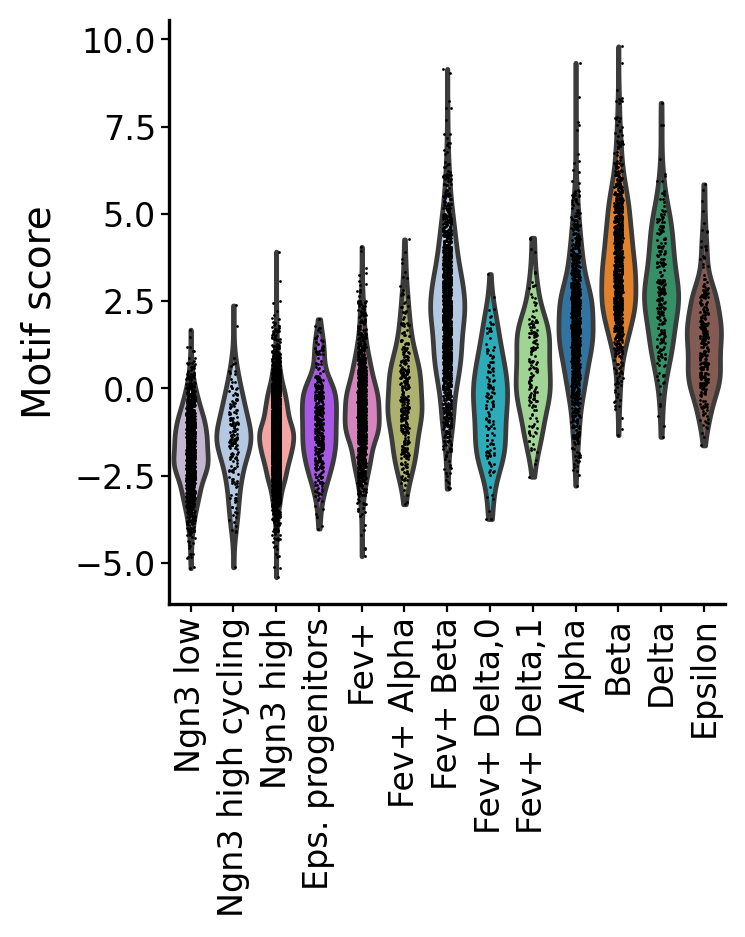

In [52]:
sc.pl.violin(tp0.adata, keys="M09209_2.00", groupby="cell_type_refined", ncols=1, rotation=90, ylabel="Motif score")

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:770: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[groupby]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/icb/dominik.klein/

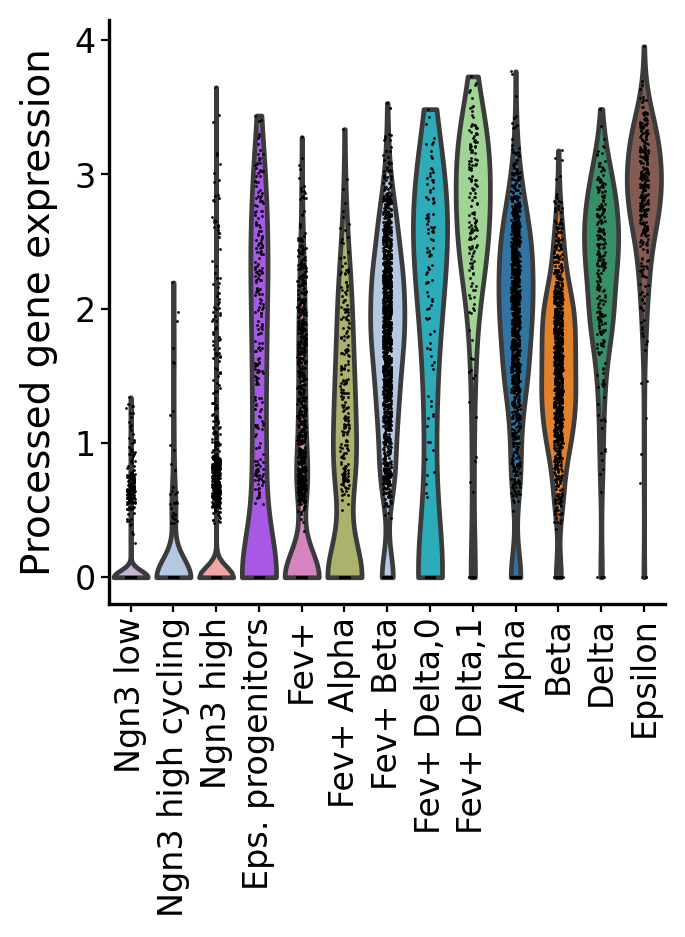

In [53]:
sc.pl.violin(tp0.adata, keys="Isl1", groupby="cell_type_refined", ncols=1, rotation=90, ylabel="Processed gene expression")

In [54]:
df_delta.to_csv(os.path.join(output_dir, "diff_motif_delta.csv"))

# Beta

In [55]:
beta_drivers = pd.read_csv("/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/plots/driver_features/drivers_beta_tfs.csv")
beta_drivers

,Unnamed: 0,Beta_pull_corr,Beta_pull_pval,Beta_pull_qval,Beta_pull_ci_low,Beta_pull_ci_high
0,Mafa,0.668961,0.000000e+00,0.000000e+00,0.653643,0.683731
1,Hspa5,0.553791,0.000000e+00,0.000000e+00,0.534630,0.572383
2,Rora,0.543927,0.000000e+00,0.000000e+00,0.524472,0.562815
3,Mlxipl,0.470295,1.382902e-295,5.220454e-293,0.448821,0.491227
4,Mafb,0.431096,9.739473e-242,2.941321e-239,0.408671,0.453000
...,...,...,...,...,...,...
1510,Twist2,NaN,NaN,NaN,NaN,NaN
1511,Tal1,NaN,NaN,NaN,NaN,NaN
1512,Irx5,NaN,NaN,NaN,NaN,NaN
1513,Nr5a1,NaN,NaN,NaN,NaN,NaN


In [68]:
beta_drivers[beta_drivers["Unnamed: 0"]=="Mafg"]

,Unnamed: 0,Beta_pull_corr,Beta_pull_pval,Beta_pull_qval,Beta_pull_ci_low,Beta_pull_ci_high
13,Mafg,0.277122,2.961573e-93,2.353671e-91,0.251801,0.302063


In [56]:
ranks_beta = sc.get.rank_genes_groups_df(adata_chromvar, group="Beta")
df_beta = pd.merge(ranks_beta, motif2TF, left_on="names", right_on="Motif_ID")
df_beta.head()



,names,scores,logfoldchanges,pvals,pvals_adj,Motif_ID,direct_TF,TF_name
0,M08835_2.00,44.736942,5.219267,0.0,0.0,M08835_2.00,Mafg,"[Mafk, Mafa, Mafg, Maf, Mafb]"
1,M08809_2.00,44.736942,5.219267,0.0,0.0,M08809_2.00,NaN,"[Mafk, Mafa, Mafg, Maf, Mafb]"
2,M08834_2.00,44.417850,5.101277,0.0,0.0,M08834_2.00,Maff,[Maff]
3,M08839_2.00,44.235657,5.019565,0.0,0.0,M08839_2.00,Maf,"[Mafk, Mafa, Mafg, Maf, Mafb]"
4,M08817_2.00,44.006714,4.805994,0.0,0.0,M08817_2.00,Mafk,"[Mafk, Mafa, Mafg, Maf, Mafb]"


/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:770: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[groupby]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/icb/dominik.klein/

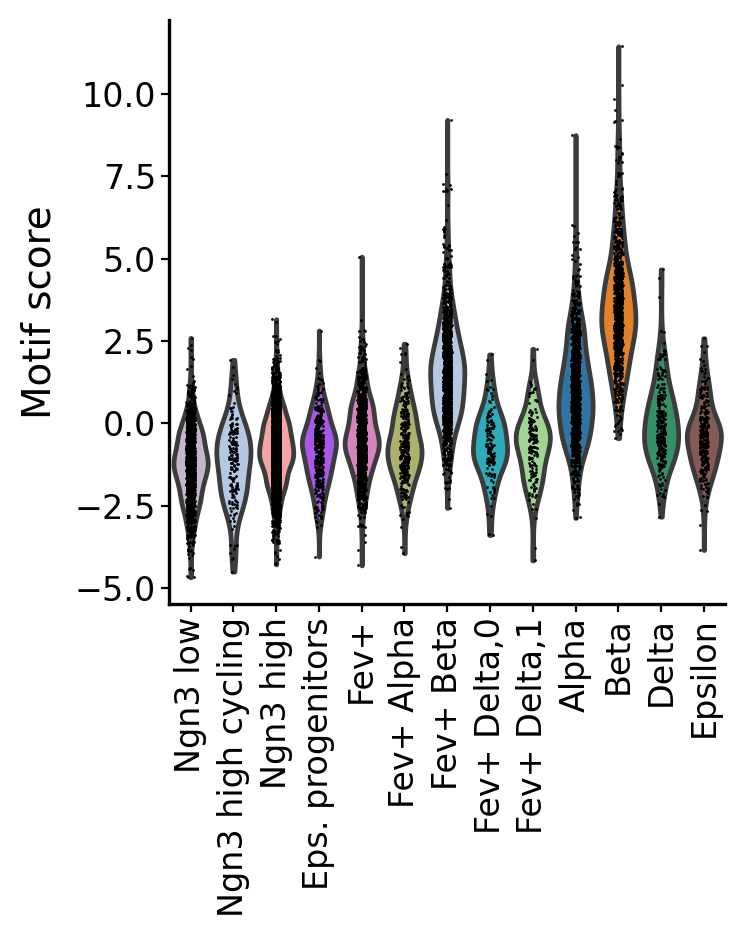

In [57]:
sc.pl.violin(tp0.adata, keys="M08835_2.00", groupby="cell_type_refined", ncols=1, rotation=90, ylabel="Motif score")

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:770: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[groupby]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/icb/dominik.klein/

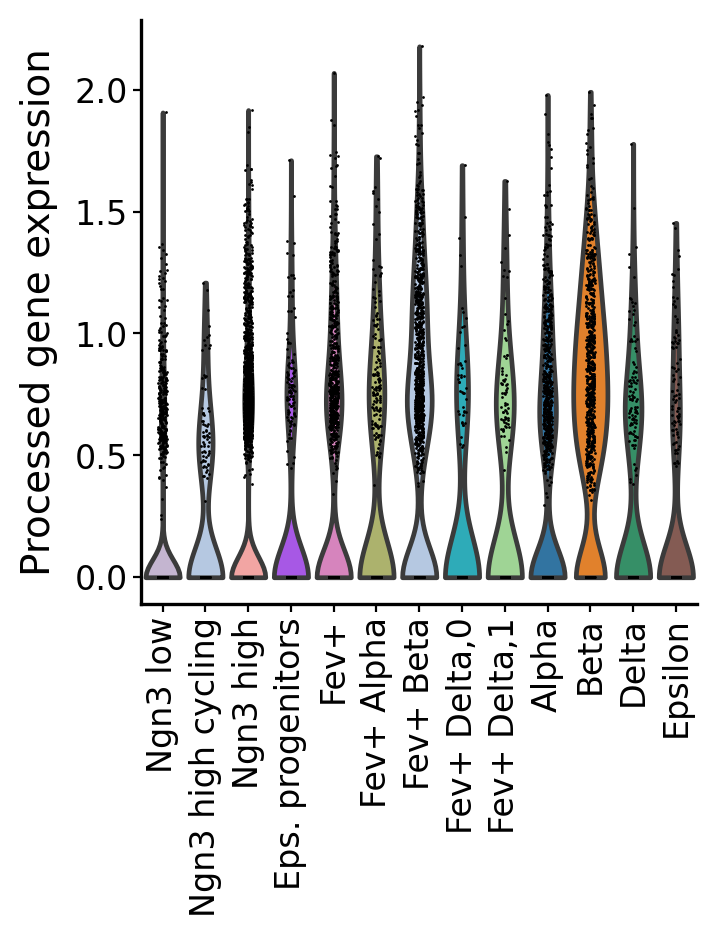

In [58]:
sc.pl.violin(tp0.adata, keys="Mafg", groupby="cell_type_refined", ncols=1, rotation=90, ylabel="Processed gene expression")

In [59]:
beta_drivers.to_csv(os.path.join(output_dir, "driver_beta_tfs.csv"))
df_beta.to_csv(os.path.join(output_dir, "diff_motif_beta.csv"))

# Alpha

In [60]:
alpha_drivers = pd.read_csv("/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/plots/driver_features/drivers_alpha_tfs.csv")
alpha_drivers

,Unnamed: 0,Alpha_pull_corr,Alpha_pull_pval,Alpha_pull_qval,Alpha_pull_ci_low,Alpha_pull_ci_high
0,Mctp2,0.595638,0.0,0.0,0.577786,0.612921
1,Irx2,0.567377,0.0,0.0,0.548630,0.585554
2,Irx1,0.541528,0.0,0.0,0.522003,0.560487
3,Smarca1,0.539894,0.0,0.0,0.520320,0.558900
4,Pou6f2,0.499082,0.0,0.0,0.478360,0.519248
...,...,...,...,...,...,...
1510,Twist2,NaN,NaN,NaN,NaN,NaN
1511,Tal1,NaN,NaN,NaN,NaN,NaN
1512,Irx5,NaN,NaN,NaN,NaN,NaN
1513,Nr5a1,NaN,NaN,NaN,NaN,NaN


In [61]:
alpha_drivers.head(20)

,Unnamed: 0,Alpha_pull_corr,Alpha_pull_pval,Alpha_pull_qval,Alpha_pull_ci_low,Alpha_pull_ci_high
0,Mctp2,0.595638,0.000000e+00,0.000000e+00,0.577786,0.612921
1,Irx2,0.567377,0.000000e+00,0.000000e+00,0.548630,0.585554
2,Irx1,0.541528,0.000000e+00,0.000000e+00,0.522003,0.560487
3,Smarca1,0.539894,0.000000e+00,0.000000e+00,0.520320,0.558900
4,Pou6f2,0.499082,0.000000e+00,0.000000e+00,0.478360,0.519248
5,Etv1,0.484983,0.000000e+00,0.000000e+00,0.463886,0.505529
6,A1cf,0.457942,9.201261e-278,1.984843e-275,0.436158,0.479189
7,Meis2,0.432583,1.216817e-243,2.296742e-241,0.410193,0.454452
8,Arx,0.416070,4.337013e-223,6.548889e-221,0.393304,0.438326
9,Isl1,0.324891,4.381616e-130,5.513533e-128,0.300327,0.349025


In [62]:
ranks_alpha = sc.get.rank_genes_groups_df(adata_chromvar, group="Alpha")
df_alpha = pd.merge(ranks_alpha, motif2TF, left_on="names", right_on="Motif_ID")
df_alpha.head()



,names,scores,logfoldchanges,pvals,pvals_adj,Motif_ID,direct_TF,TF_name
0,M05413_2.00,40.054066,4.005823,0.0,0.0,M05413_2.00,NaN,"[Pax2, Pax6]"
1,M03291_2.00,39.711391,4.631095,0.0,0.0,M03291_2.00,NaN,"[Pax2, Pax6]"
2,M03900_2.00,39.085533,4.279438,0.0,0.0,M03900_2.00,NaN,[Pax6]
3,M05412_2.00,38.901619,3.692538,0.0,0.0,M05412_2.00,NaN,"[Pax2, Pax6]"
4,M05436_2.00,38.531826,3.871445,0.0,0.0,M05436_2.00,NaN,[Pax4]


/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:770: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[groupby]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/icb/dominik.klein/

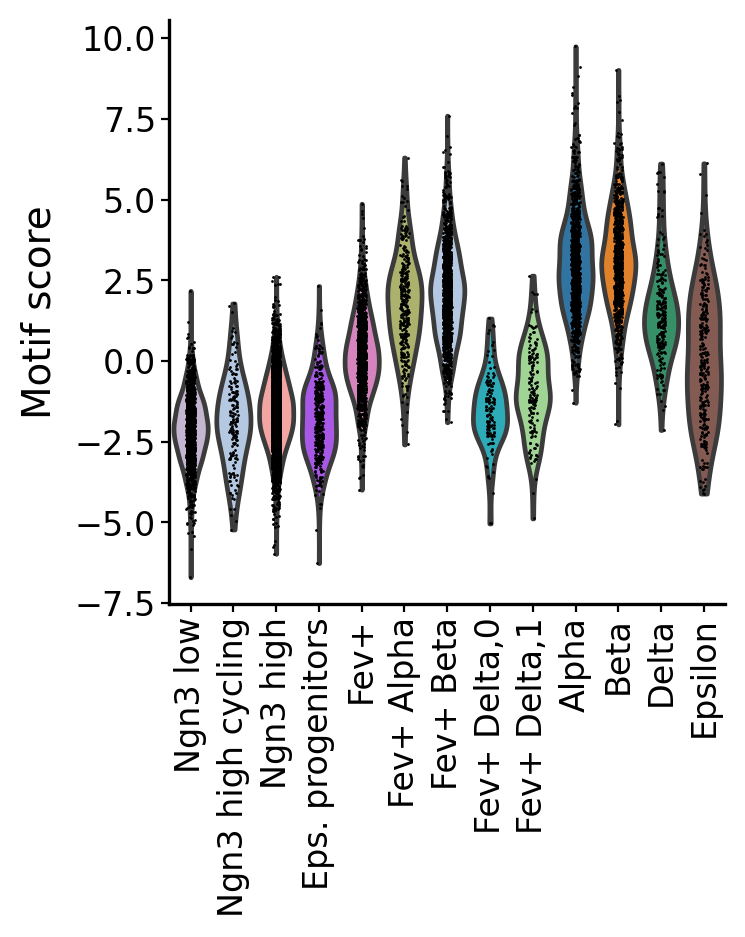

In [63]:
#sc.pl.violin(tp0.adata, keys="M05413_2.00", groupby="cell_type_refined", ncols=1, rotation=90, ylabel="Motif score")
sc.pl.violin(tp0.adata, keys="M03900_2.00", groupby="cell_type_refined", ncols=1, rotation=90, ylabel="Motif score")

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:770: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[groupby]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/icb/dominik.klein/

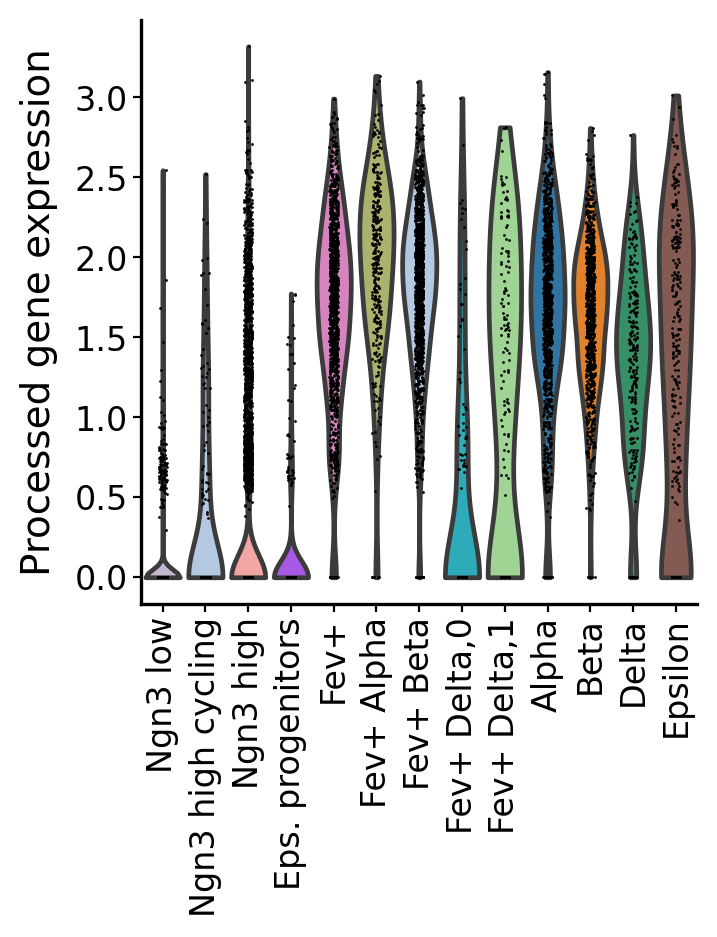

In [64]:
sc.pl.violin(tp0.adata, keys="Pax6", groupby="cell_type_refined", ncols=1, rotation=90, ylabel="Processed gene expression")

In [65]:
alpha_drivers.to_csv(os.path.join(output_dir, "driver_alpha_tfs.csv"))
df_alpha.to_csv(os.path.join(output_dir, "diff_motif_alpha.csv"))

# Epsilon

In [51]:
eps_drivers = pd.read_csv("/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/plots/driver_features/driver_eps_tfs.csv")
eps_drivers

,Unnamed: 0,Epsilon_pull_corr,Epsilon_pull_pval,Epsilon_pull_qval,Epsilon_pull_ci_low,Epsilon_pull_ci_high
0,Arg1,0.458313,2.758567e-278,4.165436e-275,0.436538,0.479550
1,Isl1,0.290014,1.783715e-102,1.346705e-99,0.264884,0.314749
2,Arx,0.273085,1.792628e-90,9.022892e-88,0.247706,0.298089
3,Foxd3,0.271851,1.241227e-89,4.685632e-87,0.246455,0.296875
4,Mctp2,0.270957,5.013486e-89,1.514073e-86,0.245548,0.295994
...,...,...,...,...,...,...
1510,Twist2,NaN,NaN,NaN,NaN,NaN
1511,Tal1,NaN,NaN,NaN,NaN,NaN
1512,Irx5,NaN,NaN,NaN,NaN,NaN
1513,Nr5a1,NaN,NaN,NaN,NaN,NaN


In [52]:
ranks_eps = sc.get.rank_genes_groups_df(adata_chromvar, group="Epsilon")
df_eps = pd.merge(ranks_eps, motif2TF, left_on="names", right_on="Motif_ID")
df_eps.head(n=50)



,names,scores,logfoldchanges,pvals,pvals_adj,Motif_ID,direct_TF,TF_name
0,M07961_2.00,16.305643,2.638924,8.998811e-60,2.848361e-58,M07961_2.00,NaN,"[Foxa1, Foxa2, Foxa3, Foxb1]"
1,M07959_2.00,16.271872,2.603100,1.563083e-59,4.921665e-58,M07959_2.00,NaN,"[Foxa1, Foxa2, Foxa3, Foxb2, Foxb1]"
2,M08121_2.00,16.264652,2.483038,1.758644e-59,5.508585e-58,M08121_2.00,Foxa2,"[Foxa1, Foxa2, Foxa3, Foxb2, Foxb1]"
3,M09088_2.00,16.229338,2.630548,3.128165e-59,9.598359e-58,M09088_2.00,NaN,"[Foxa1, Foxa2, Foxa3, Foxb2, Foxb1]"
4,M09090_2.00,16.188122,2.328902,6.116819e-59,1.867338e-57,M09090_2.00,NaN,"[Foxa1, Foxa2, Foxa3, Foxb1]"
5,M01983_2.00,15.959681,2.272333,2.439778e-57,7.122731e-56,M01983_2.00,Foxb1,"[Foxa1, Foxa2, Foxa3, Foxb2, Foxb1]"
6,M08117_2.00,15.899007,2.296022,6.437720e-57,1.861368e-55,M08117_2.00,NaN,"[Foxa1, Foxa2, Foxa3, Foxb1]"
7,M09103_2.00,15.853451,2.494545,1.330695e-56,3.829092e-55,M09103_2.00,Foxa1,"[Foxa1, Foxa2, Foxa3, Foxb1]"
8,M07960_2.00,15.791625,2.237093,3.553062e-56,9.625277e-55,M07960_2.00,NaN,"[Foxa1, Foxa2, Foxa3, Foxb1]"
9,M03030_2.00,15.737431,1.906895,8.377711e-56,2.229361e-54,M03030_2.00,NaN,"[Foxa1, Foxa2, Foxa3, Foxb2, Foxb1]"


In [53]:
df_eps[df_eps.direct_TF=="Tead1"]

,names,scores,logfoldchanges,pvals,pvals_adj,Motif_ID,direct_TF,TF_name
124,M09438_2.00,11.245521,1.421385,2.436562e-29,2.286035e-28,M09438_2.00,Tead1,"[Tead4, Tead2, Tead1]"


/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:770: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[groupby]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureW

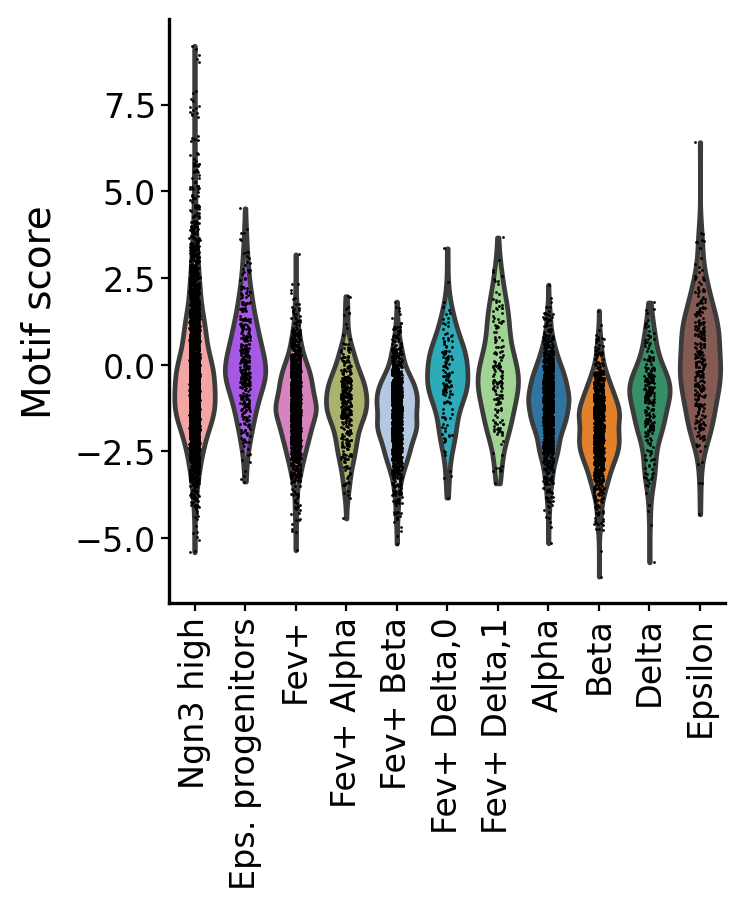

In [54]:
sc.pl.violin(tp0.adata[~tp0.adata.obs["cell_type"].isin(("Ngn3 low", "Ngn3 high cycling"))], keys="M09438_2.00", groupby="cell_type_refined", ncols=1, rotation=90, ylabel="Motif score")

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:770: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[groupby]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureW

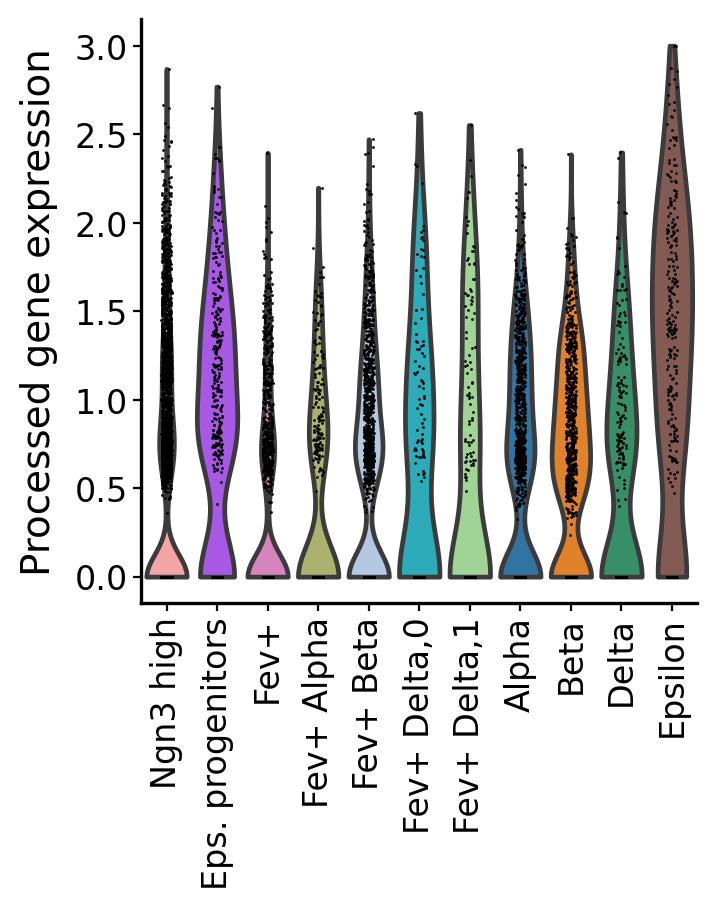

In [55]:
sc.pl.violin(tp0.adata[~tp0.adata.obs["cell_type"].isin(("Ngn3 low", "Ngn3 high cycling"))], keys="Tead1", groupby="cell_type_refined", ncols=1, rotation=90, ylabel="Processed gene expression")

In [56]:
eps_drivers.to_csv(os.path.join(output_dir, "driver_eps_tfs.csv"))
df_eps.to_csv(os.path.join(output_dir, "diff_motif_eps.csv"))